<a href="https://colab.research.google.com/github/ranj10/Human_activity_recognition_using-LSTM/blob/main/Human_activity_recognition_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


# Importing necessary libraries and checking total no of features in Features.txt

In [ ]:
# Getting no of feature from feature.txt in Google Drive
features=list()

with open('/content/drive/MyDrive/Human activity recognition/features.txt') as f:
  features = [line.split()[1] for line in f.readlines()]


print("Number of features: {}".format(len(features)))


Number of features: 561


# Loading train and test Dataset

In [ ]:
X_train=pd.read_csv('/content/drive/MyDrive/Human activity recognition/train-20241002T173137Z-001/train/X_train.txt',header=None,delim_whitespace=True,encoding="latin-1")
X_train.columns=features

# Add subject column to X_train dataframe
X_train['Subject'] = pd.read_csv("/content/drive/MyDrive/Human activity recognition/train-20241002T173137Z-001/train/subject_train.txt", header=None).squeeze("columns")

# Load y_train and map activity labels
y_train = pd.read_csv("/content/drive/MyDrive/Human activity recognition/train-20241002T173137Z-001/train/y_train.txt", names=['Activity']).squeeze("columns")
y_train_labels = y_train.map({1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})

# Put all columns in a single dataframe
train = X_train.copy()  # Use copy to avoid changing the original X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.head()


<ipython-input-4-1e5afde5c87a>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train=pd.read_csv('/content/drive/MyDrive/Human activity recognition/train-20241002T173137Z-001/train/X_train.txt',header=None,delim_whitespace=True,encoding="latin-1")


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [ ]:
train.shape


(7352, 564)

In [ ]:
X_test=pd.read_csv('/content/drive/MyDrive/Human activity recognition/test-20241002T173128Z-001/test/X_test.txt',header=None,delim_whitespace=True,encoding="latin-1")
X_test.columns=features

# Add subject column to X_test dataframe
X_test['Subject'] = pd.read_csv("/content/drive/MyDrive/Human activity recognition/test-20241002T173128Z-001/test/subject_test.txt", header=None).squeeze("columns")

# Load y_test and map activity labels
y_test = pd.read_csv("/content/drive/MyDrive/Human activity recognition/test-20241002T173128Z-001/test/y_test.txt", names=['Activity']).squeeze("columns")
y_test_labels = y_test.map({1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})

# Put all columns in a single dataframe
test = X_test.copy()  # Use copy to avoid changing the original X_train
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.head()

<ipython-input-6-d1330966bd4f>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test=pd.read_csv('/content/drive/MyDrive/Human activity recognition/test-20241002T173128Z-001/test/X_test.txt',header=None,delim_whitespace=True,encoding="latin-1")


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [ ]:
test.shape

(2947, 564)

# Data Cleaning

# 1.Chaking for Duplicated value:

In [ ]:
print("No. of Duplicate values in Train:{}".format(sum(train.duplicated())))
print("No. of Duplicate values in Test:{}".format(sum(test.duplicated())))

No. of Duplicate values in Train:0
No. of Duplicate values in Test:0


# 2.Checking for null values:

In [ ]:
print("No. of Null values in Train:{}".format(train.isnull().values.sum()))
print("No. of Null values in Test:{}".format(test.isnull().values.sum()))

No. of Null values in Train:0
No. of Null values in Test:0


# 3.Checking for Data Imbalance:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['font.family']='Dejavu Sans'

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

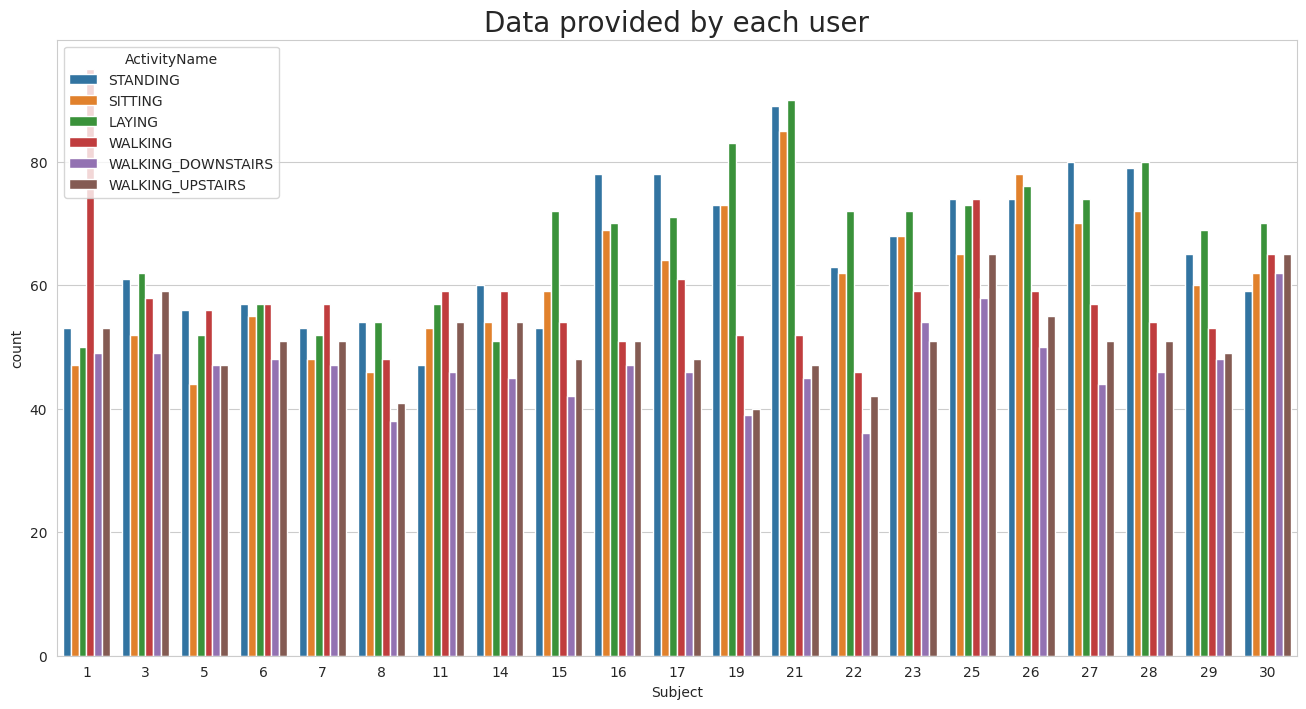

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user',fontsize=20)
sns.countplot(x='Subject',hue='ActivityName',data=train)
plt.show()


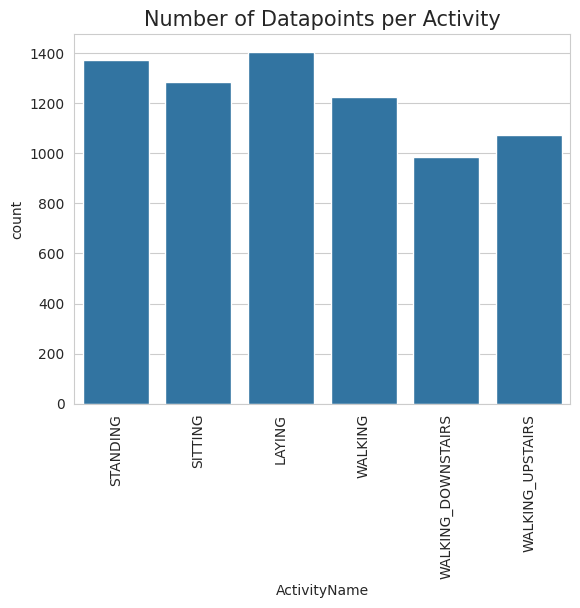

In [ ]:
plt.title('Number of Datapoints per Activity',fontsize=15)
sns.countplot(x='ActivityName',data=train)
plt.xticks(rotation=90)
plt.show()

# Observatio:Data is almost well balanced.

# 4.Changing feature names:

In [ ]:
columns=train.columns

# Removing (),-,',' from feature names

columns=columns.str.replace('()', '')
columns=columns.str.replace('-', '')
columns=columns.str.replace(',', '')

train.columns=columns
test.columns=columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angle(tBodyAccMeangravity)', 'angle(tBodyAccJerkMean)gravityMean)',
       'angle(tBodyGyroMeangravityMean)',
       'angle(tBodyGyroJerkMeangravityMean)', 'angle(XgravityMean)',
       'angle(YgravityMean)', 'angle(ZgravityMean)', 'Subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

# 5.Saving this dataframe in csv file

In [ ]:
train.to_csv('/content/drive/MyDrive/Human activity recognition/csv_files-20241002T172212Z-001/csv_files/train.csv',index=False)
test.to_csv('/content/drive/MyDrive/Human activity recognition/csv_files-20241002T172212Z-001/csv_files/train.csv',index=False)

# Exploratory Data Analysis:
# Static and Dynamic activity:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*pl

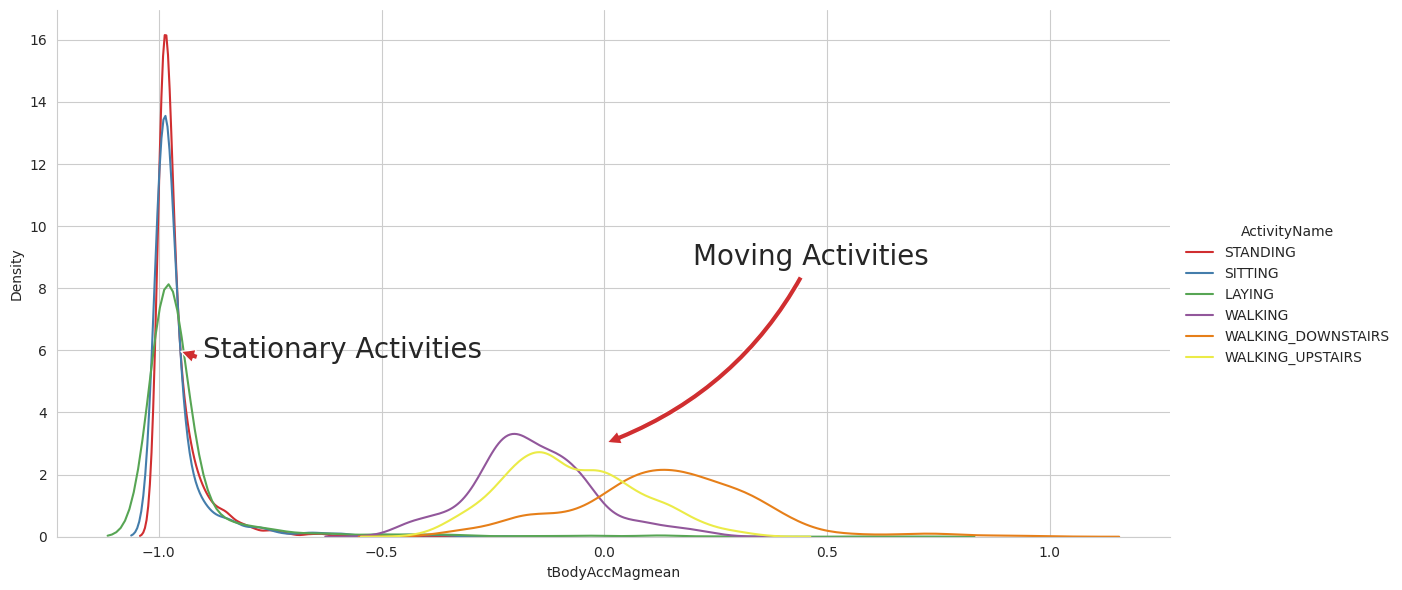

In [ ]:
# Set color palette
sns.set_palette("Set1", desat=0.80)

# Create a FacetGrid to plot distributions for each ActivityName
facetgrid = sns.FacetGrid(train, hue="ActivityName", height=6, aspect=2)
facetgrid.map(sns.kdeplot, 'tBodyAccMagmean', shade=False).add_legend()

# Annotate stationary activities
plt.annotate("Stationary Activities", xy=(-0.956, 6), xytext=(-0.9, 6), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=-0.2"))

# Annotate moving activities
plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=-0.2"))

plt.show()
